<a href="https://colab.research.google.com/github/vincent0965/Colab_note/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM:人均犯罪率

ZN:25,000平方英尺以上民用土地的比例

INDUS:城鎮非零售業商用土地比例

CHAS:是否鄰近查爾斯河，1是鄰近，0是不鄰近

NOX:一氧化氮濃度（千萬分之一）

RM:住宅的平均房間數

AGE:自住且建於1940年前的房屋比例

DIS:到5個波士頓就業中心的加權距離

RAD:到高速公路的便捷度指數

TAX:每萬元的房產稅率

PTRATIO:城鎮學生教師比例

B:1000(Bk − 0.63)2 其中Bk是城鎮中黑人比例

LSTAT:低收入人群比例

ans:自住房屋中位數價格，單位(千元)


In [ ]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# 預處理:pandas/DataFrame
# 機器學習:numpy/np.array
import numpy as np
from sklearn.model_selection import train_test_split
# axis=0>行；axis=1>列
x, y = df.drop(["target"], axis = 1), df["target"]
x, y = np.array(x), np.array(y)
# train_test_split([想要處理的陣列(如果有兩個以上，個數要一樣)], test_size(要分幾份), random_state(隨機值固定))
# train_test_split([1, 2, 3, 4], [5, 6, 7, 8], test_size = 0.25) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)



In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 3, random_state = 1)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

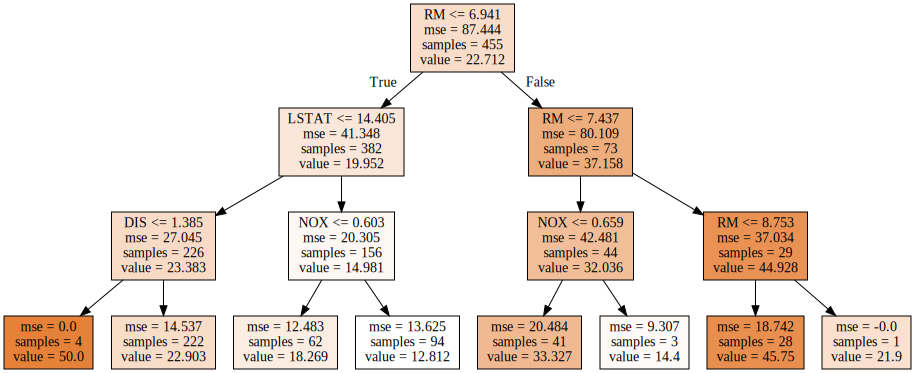

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, 
           feature_names=boston["feature_names"],
           filled=True)
graphviz.Source(g)

In [ ]:
pre = reg.predict(x_test)
pre

array([15.81794872, 22.73979592, 26.18125   , 20.63703704, 34.184     ,
       20.25263158, 20.63703704, 20.63703704, 50.        , 22.73979592,
       15.81794872, 34.184     , 45.81578947, 20.25263158,  9.71707317,
       15.81794872, 20.25263158, 26.18125   ,  9.71707317, 20.25263158,
       29.9375    , 20.25263158, 26.18125   , 22.73979592, 20.25263158,
       26.18125   , 15.81794872, 22.73979592, 22.73979592, 20.25263158,
       22.73979592, 15.81794872, 22.73979592, 15.81794872, 22.73979592,
        9.71707317, 22.73979592, 20.25263158,  9.71707317, 15.81794872,
       20.25263158, 20.25263158, 26.18125   , 20.63703704, 26.18125   ,
       20.25263158, 15.81794872, 22.73979592, 15.81794872,  9.71707317,
       15.55769231])

In [ ]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.5504595259087226